# Walks of Traces

In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [3]:
df.head()

,Trace,Admissible,Word Length,XVal,YVal
0,18,0,4,0,0
1,18,0,4,0,0
2,46,1,6,0,-4
3,46,1,8,-4,4
4,46,1,6,0,-4


In [4]:
df=pd.read_csv("../CSV/wordlenghtandhomology.csv")

admissibles=df.loc[df.Admissible==0]
non_admis=df.loc[df.Admissible==1]

Function to plot a given matrix via its decomposition

## Plotting the Multiplicity of points in $\mathbb{Z}^2$

In [6]:
finals=[[df.XVal.values[i],df.YVal.values[i]] for i in range(len(df))]

#finding each final position that we get
multiplicity=[]
for x in finals:
    if x not in multiplicity:
        multiplicity.append(x)
        
#counting the multiplicity of each final position        
counts=[finals.count(i) for i in multiplicity]

We can look at the set of final posititions for all of the points in our dataframe

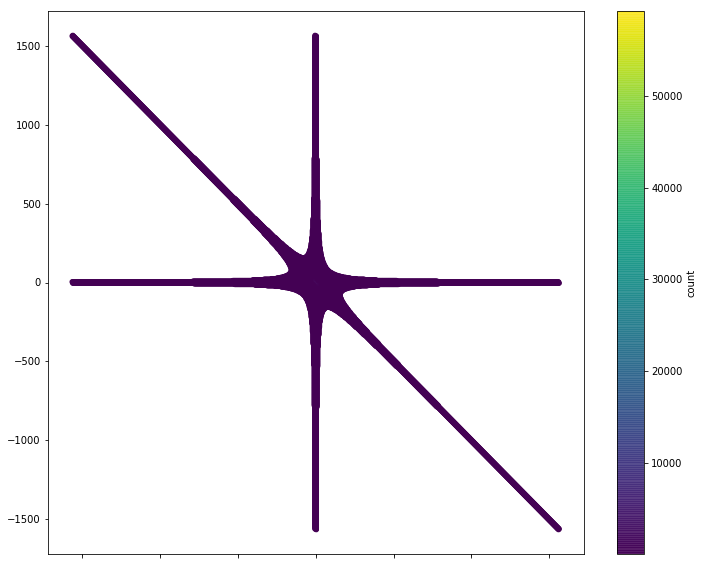

In [7]:
xpositions=[a[0] for a in multiplicity]
ypositions=[a[1] for a in multiplicity]
dataframeCreate=pd.DataFrame({"xval":xpositions,"yval":ypositions,"count":counts})
dataframeCreate.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(12,10), c="count",cmap = plt.get_cmap("viridis"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)

plt.show()

We can zoom in to where the action is happening more

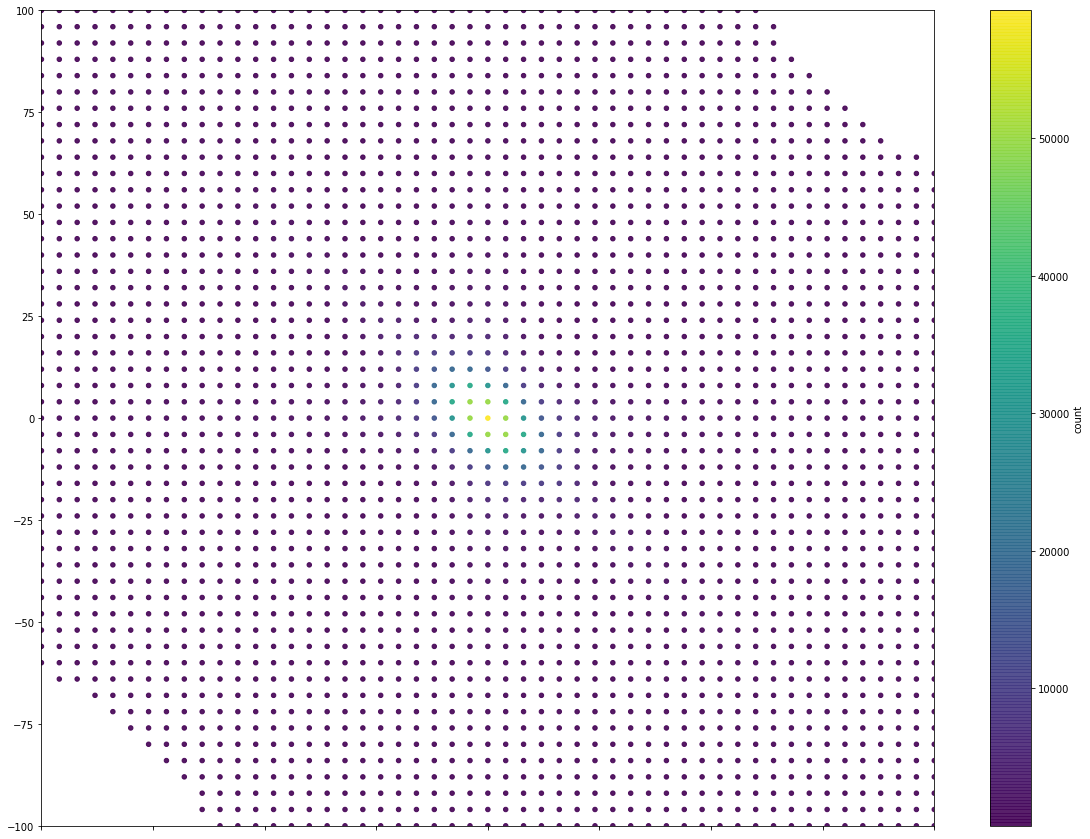

In [8]:
dataframeCreate.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("viridis"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes Zoomed", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("")
plt.xlim(-100,100)
plt.ylim(-100, 100)
plt.show()

### We can just look at what happens for admissible traces

In [9]:
finals_admis=[[admissibles.XVal.values[i],admissibles.YVal.values[i]] for i in range(len(admissibles))]

#finding each final position that we get
multiplicity_admis=[]
for x in finals_admis:
    if x not in multiplicity_admis:
        multiplicity_admis.append(x)
        
#counting the multiplicity of each final position        
counts_admis=[finals_admis.count(i) for i in multiplicity_admis]

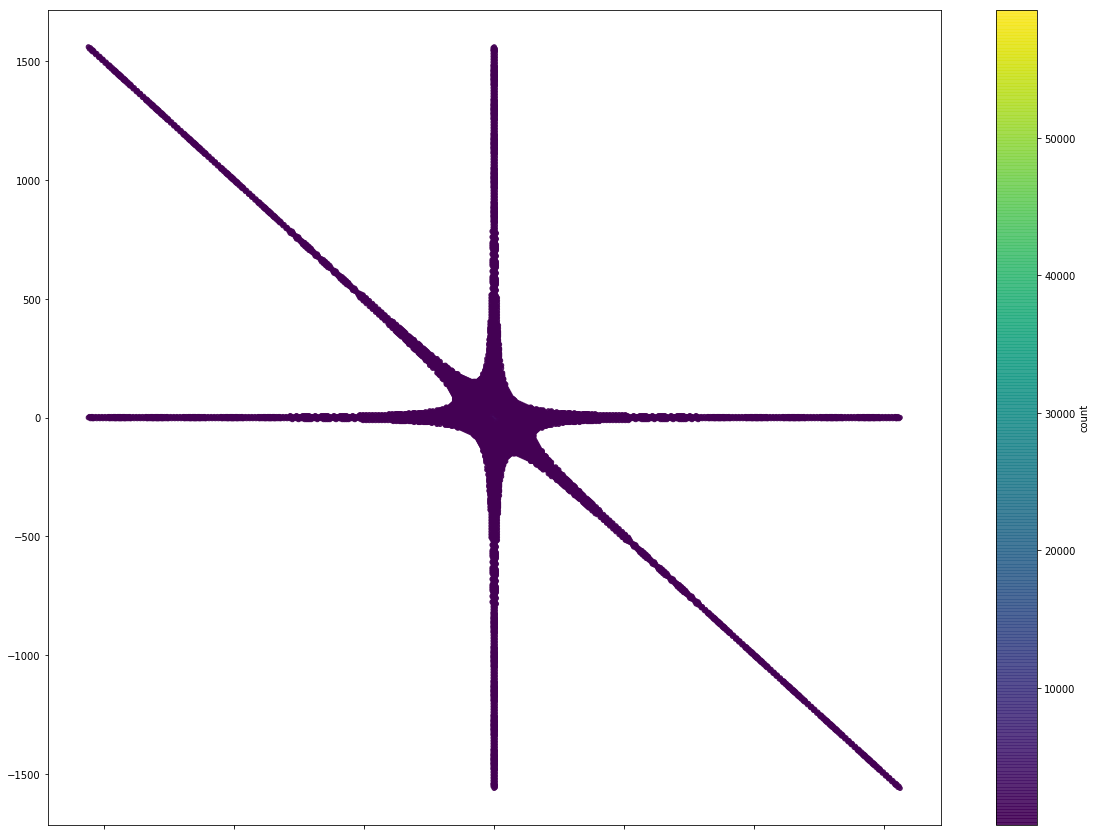

In [10]:
xpositions_admis=[a[0] for a in multiplicity_admis]
ypositions_admis=[a[1] for a in multiplicity_admis]
dataframeCreate_admis=pd.DataFrame({"xval":xpositions_admis,"yval":ypositions_admis,"count":counts_admis})
dataframeCreate_admis.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("viridis"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes for only admissible traces", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)

plt.show()

Looking at the only zoomed in values

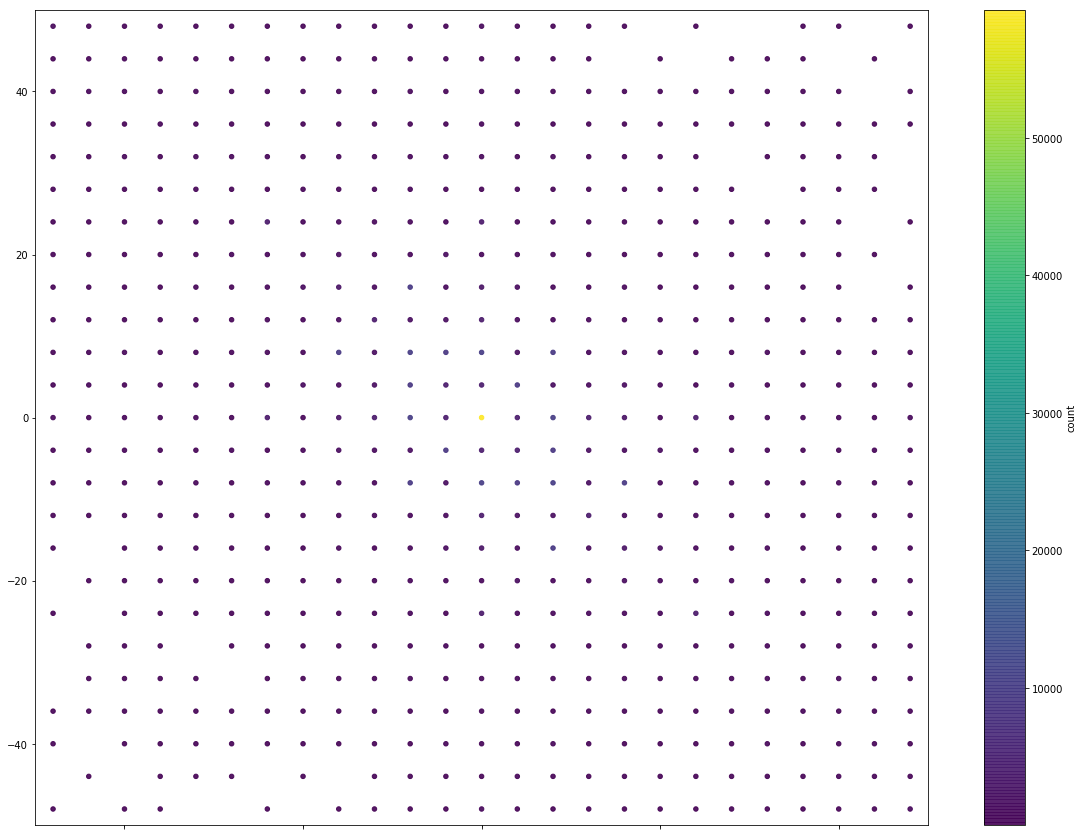

In [11]:
dataframeCreate_admis.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("viridis"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes of admissibles Zoomed", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)
plt.xlim(-50,50)
plt.ylim(-50, 50)
plt.show()

### We can just look at what happens for non-admissible traces

In [12]:
finals_non=[[non_admis.XVal.values[i],non_admis.YVal.values[i]] for i in range(len(non_admis))]

#finding each final position that we get
multiplicity_non=[]
for x in finals_non:
    if x not in multiplicity_non:
        multiplicity_non.append(x)
        
#counting the multiplicity of each final position        
counts_non=[finals_non.count(i) for i in multiplicity_non]+[max(counts)]

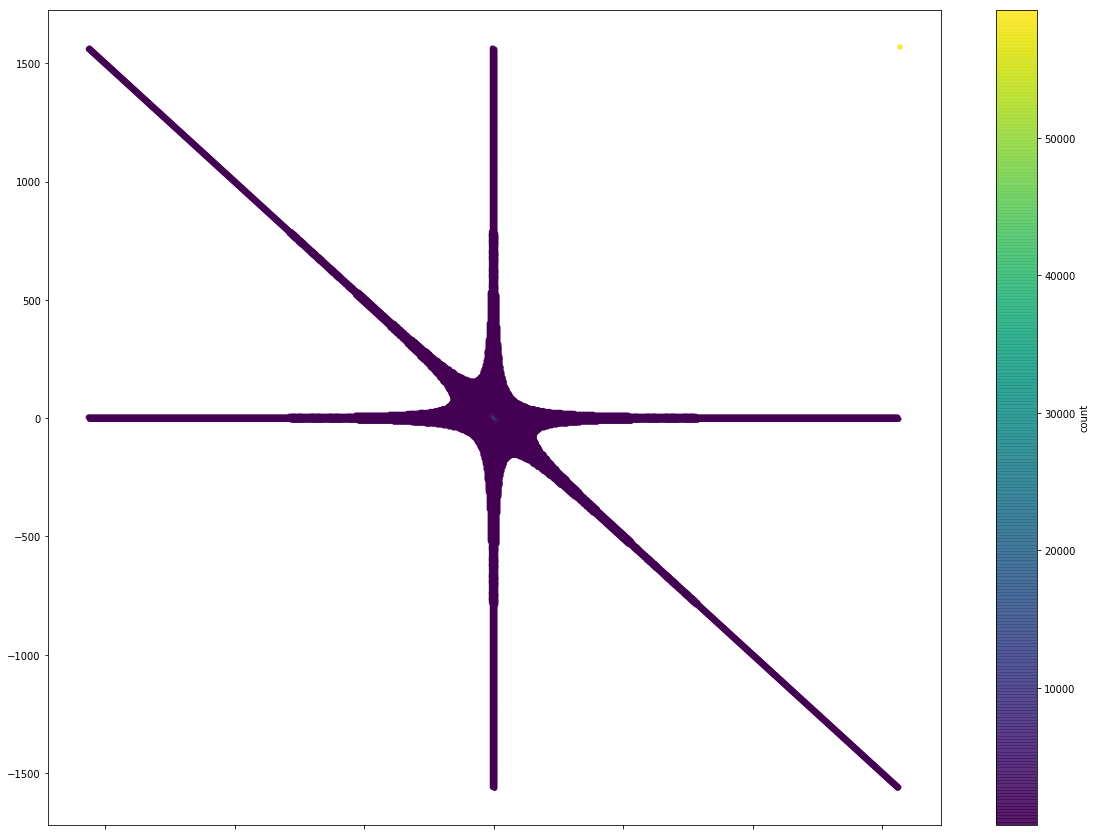

In [17]:
#an extra point is added in off the mapping to emphasise the scale between all of the pictures
xpositions_non=[a[0] for a in multiplicity_non]+[max(xpositions)+5]
ypositions_non=[a[1] for a in multiplicity_non]+[max(ypositions)+5]

dataframeCreate_non=pd.DataFrame({"xval":xpositions_non,"yval":ypositions_non,"count":counts_non})
dataframeCreate_non.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("viridis"), 
             colorbar=True)

#plt.title("Heat map of the final positions of the conjugacy classes for only non-admissible traces", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)

plt.show()

<Figure size 1440x720 with 0 Axes>

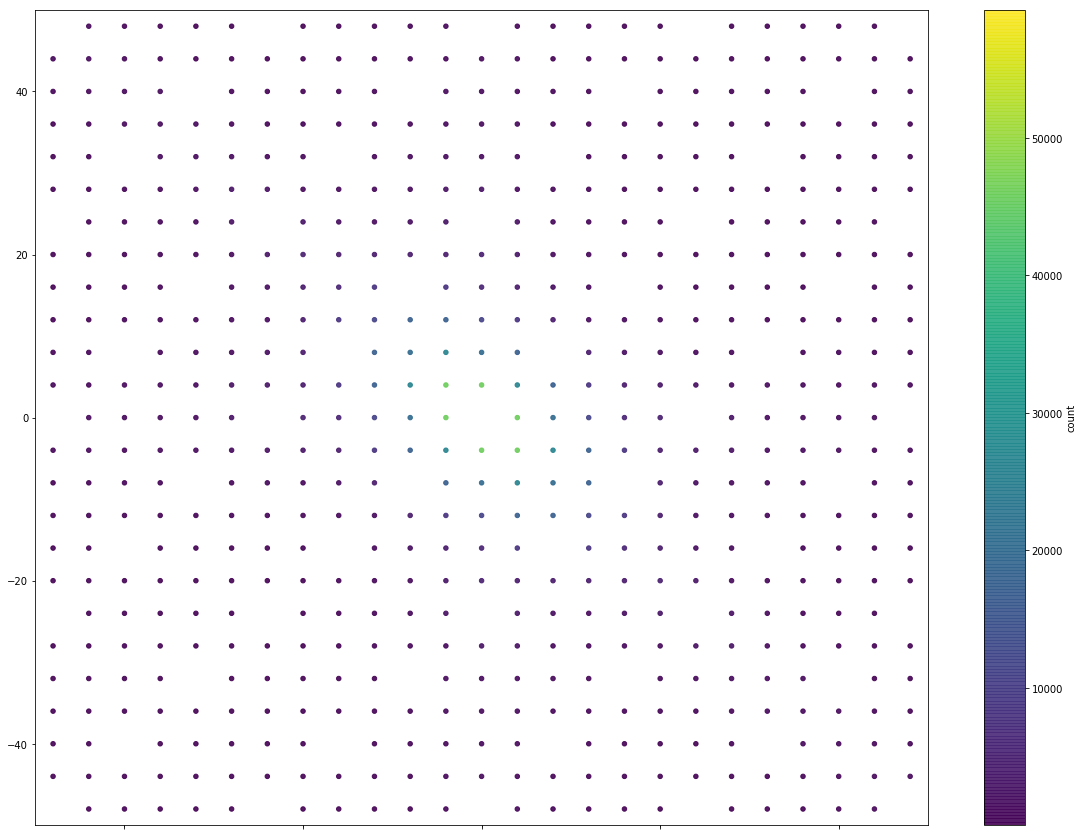

In [14]:
plt.figure(figsize=(20,10))
dataframeCreate_non.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("viridis"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes of non-admissibles Zoomed", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)
plt.xlim(-50,50)
plt.ylim(-50, 50)
plt.show()

## Here we are looking at the average length of a walk in the H conjugacy class case

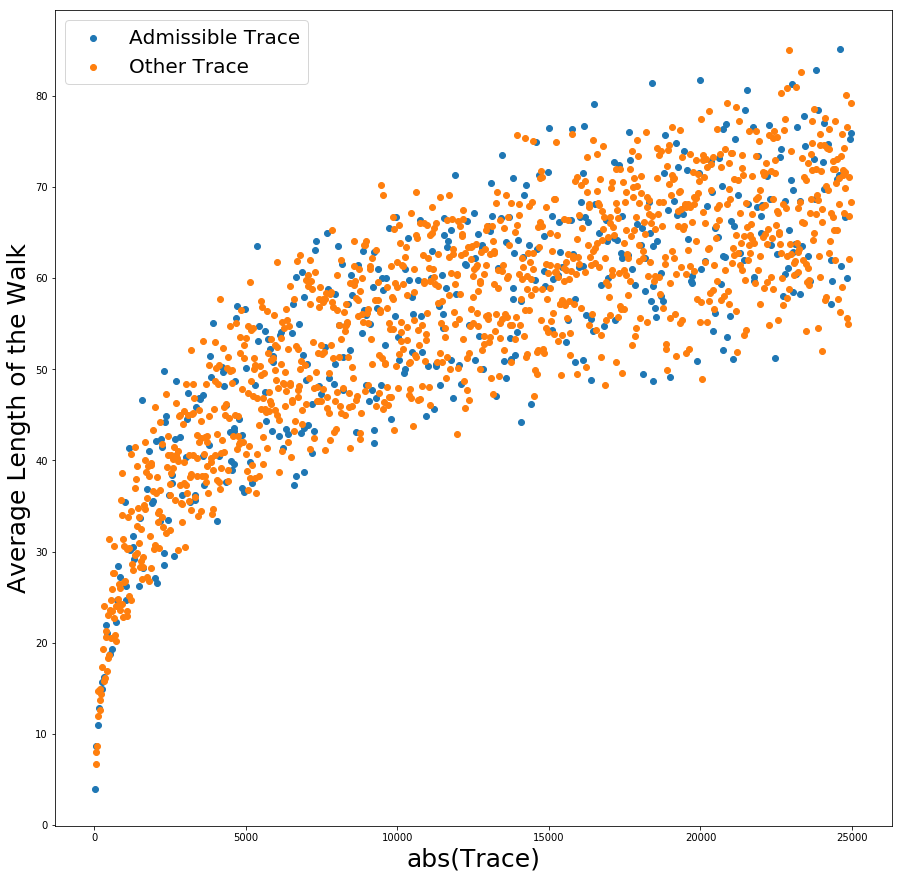

In [22]:
df_traces=df.copy()
df_traces.drop_duplicates(subset ="Trace", keep = "first", inplace = True)
df_traces=pd.DataFrame({"Trace": df_traces.Trace, "Admissible": df_traces.Admissible, 'Word Length': df.groupby(df.Trace)["Word Length"].mean().values })


plt.figure(figsize=(15,15))
plt.scatter(df_traces.loc[(df_traces.Admissible==0)].Trace.values, df_traces.loc[(df_traces.Admissible==0)]["Word Length"].values,label='Admissible Trace')
plt.scatter(df_traces.loc[(df_traces.Admissible==1)].Trace.values, df_traces.loc[(df_traces.Admissible==1)]["Word Length"].values,label='Other Trace')



plt.xlabel("abs(Trace)", fontsize = 25)
plt.ylabel("Average Length of the Walk", fontsize = 25)

# Also a title
#plt.title("A plot of the trace's average word length of the conjugacy classes", fontsize = 35)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()